<a href="https://colab.research.google.com/github/mopheiok/WatermelonCamp/blob/master/04_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup——下载代码到当前位置

In [0]:
!git clone https://github.com/pbharrin/machinelearninginaction3x.git

Cloning into 'machinelearninginaction3x'...
remote: Enumerating objects: 258, done.
remote: Total 258 (delta 0), reused 0 (delta 0), pack-reused 258
Receiving objects: 100% (258/258), 15.70 MiB | 7.14 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [0]:
from pprint import pprint

## 03_决策树

In [0]:
## Setting the working directory
import os
os.chdir("machinelearninginaction3x/Ch03")

[西瓜书中ID3决策树的实现](https://blog.csdn.net/leafage_m/article/details/79629074)

[西瓜数据集](https://blog.csdn.net/leafage_m/article/details/79560791)2.0

In [0]:
def createDataSet():
    """
    创建测试的数据集
    :return:
    """
    dataSet = [
        # 1
        ['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 2
        ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
        # 3
        ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 4
        ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
        # 5
        ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
        # 6
        ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '好瓜'],
        # 7
        ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', '好瓜'],
        # 8
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', '好瓜'],

        # ----------------------------------------------------
        # 9
        ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜'],
        # 10
        ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', '坏瓜'],
        # 11
        ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', '坏瓜'],
        # 12
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', '坏瓜'],
        # 13
        ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', '坏瓜'],
        # 14
        ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', '坏瓜'],
        # 15
        ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '坏瓜'],
        # 16
        ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', '坏瓜'],
        # 17
        ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜']
    ]

    # 特征值列表
    labels = ['色泽', '根蒂', '敲击', '纹理', '脐部', '触感']

    # 特征对应的所有可能的情况
    labels_full = {}

    for i in range(len(labels)):
        labelList = [example[i] for example in dataSet]
        uniqueLabel = set(labelList)
        labels_full[labels[i]] = uniqueLabel

    return dataSet, labels, labels_full

In [0]:
dataSet, labels, labels_full = createDataSet()
dataSet

[['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
 ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
 ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
 ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑', '好瓜'],
 ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑', '好瓜'],
 ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '好瓜'],
 ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘', '好瓜'],
 ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑', '好瓜'],
 ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜'],
 ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘', '坏瓜'],
 ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑', '坏瓜'],
 ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘', '坏瓜'],
 ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑', '坏瓜'],
 ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑', '坏瓜'],
 ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘', '坏瓜'],
 ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑', '坏瓜'],
 ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑', '坏瓜']]

In [0]:
import trees

In [0]:
# myDat, labels = trees.createDataSet()
# myDat

### 构造决策树

#### 信息增益

In [0]:
trees.calcShannonEnt(dataSet)

0.9975025463691153

#### 划分数据集

In [0]:
# len(trees.splitDataSet(myDat, 0, 3))

In [0]:
# trees.splitDataSet(myDat, 0, 0)

In [0]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet: #the the number of unique elements and their occurance
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob, 2) #log base 2
    return shannonEnt

In [0]:
def chooseBestFeatureToSplit(dataSet, labels):
    numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
    baseEntropy = trees.calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):        #iterate over all the features
        featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
        uniqueVals = set(featList)       #get a set of unique values
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = trees.splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * trees.calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
        if (infoGain > bestInfoGain):       #compare this to the best gain so far
            bestInfoGain = infoGain         #if better than current best, set to best
            bestFeature = i
    return labels[bestFeature]                      #returns an integer


In [0]:
def calcGini(dataSet):
  numEntries = len(dataSet)
  labelCounts = {}
  for featVec in dataSet:
    currentLabel = featVec[-1]
    if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
    labelCounts[currentLabel] += 1
  gini = 1.0
  for key in labelCounts:
    prob = float(labelCounts[key])/numEntries
    gini -= prob * prob
  return gini

In [0]:
def calcGiniIndex(dataSet, labelIndex, labelValue):
  
  giniIndex = 0.0
  for value in labelValue:
    subDataSet = trees.splitDataSet(dataSet, labelIndex, value)
    weight = len(subDataSet)/len(dataSet)
    giniIndex += weight * calcGini(subDataSet)
  
  return giniIndex

In [0]:
def chooseFeature(dataSet,labels, labels_full):
  numFeatures = len(dataSet[0]) -1
  miniGiniIndex = float("inf")
  bestFeature = -1
  for i in range(numFeatures):
    giniIndex = calcGiniIndex(dataSet, i, labels_full[labels[i]])
    if (giniIndex < miniGiniIndex):
      miniGiniIndex = giniIndex
      bestFeature = i
  return bestFeature

In [78]:
chooseFeature(dataSet, labels, labels_full)

3

In [54]:
calcGini(dataSet)

0.49826989619377154

In [61]:
calcGiniIndex(dataSet, 3, labels_full['纹理'])

0.2771241830065359

In [0]:
chooseBestFeatureToSplit(dataSet, labels)

'纹理'

In [71]:
trees.chooseBestFeatureToSplit(dataSet)

3

#### 递归构建决策树

构建决策树时为什么要删除label？数据分裂的时候删除了对应属性

在Python语言中函数参数是列表类型时，参数是按照引用方式传递的

[正确复制列表的方法](https://www.cnblogs.com/ifantastic/p/3811145.html)：a=b[:]

![](./images/decision%20tree.png)

In [0]:
# del(labels_full['触感'])

In [0]:
# labels_full.pop('触感')

In [0]:
def createTree(dataSet, labels, labels_full):
    classList = [example[-1] for example in dataSet]   #取出数据集中的分类标签，也就是父结点中类别分布
    
    # 情形1：数据集全属于同一个类别，count() 方法用于统计某个元素在列表中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]         #stop splitting when all of the classes are equal
    
    # 情形2：属性集合已经为空（因为每个样本中包含了类别标签，所以只剩下类别标签一个元素）或者样本在所有属性上取值相同
    dataSetUnlabeled = [sample[:-1] for sample in dataSet]
    isAllAttributesSame = dataSetUnlabeled.count(dataSetUnlabeled[0]) == len(dataSetUnlabeled)
    if len(dataSet[0]) == 1 or isAllAttributesSame:        #stop splitting when there are no more features in dataSet
        return trees.majorityCnt(classList)
    
    bestFeat = trees.chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
        
#     featValues = [example[bestFeat] for example in dataSet]
#     uniqueVals = set(featValues)
    uniqueVals = labels_full[bestFeatLabel]
    
    myTree = {bestFeatLabel:{}}
    for value in uniqueVals:
        subDataSet = trees.splitDataSet(dataSet, bestFeat, value)
        if len(subDataSet) == 0 :
          # 情形3：当前结点包含的样本集合为空，不能划分，使用父结点的最多的类为标签
          myTree[bestFeatLabel][value] = trees.majorityCnt(classList)
        else:
          subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
          del(subLabels[bestFeat])
          myTree[bestFeatLabel][value] = createTree(trees.splitDataSet(dataSet, bestFeat, value), subLabels, labels_full)
    return myTree

In [0]:
myTree = createTree(dataSet, labels, labels_full)

print("===========================")
pprint(myTree)

{'纹理': {'模糊': '坏瓜',
        '清晰': {'根蒂': {'硬挺': '坏瓜',
                      '稍蜷': {'色泽': {'乌黑': {'触感': {'硬滑': '好瓜', '软粘': '坏瓜'}},
                                    '浅白': '好瓜',
                                    '青绿': '好瓜'}},
                      '蜷缩': '好瓜'}},
        '稍糊': {'触感': {'硬滑': '坏瓜', '软粘': '好瓜'}}}}


In [0]:
import treePlotter

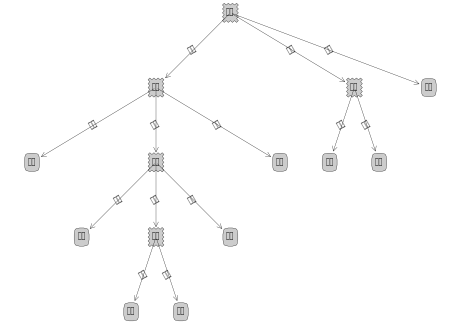

In [0]:
treePlotter.createPlot(myTree)

### 使用决策树分类

python2 和python3 中dict.keys()的返回不同，在2中返回的是list类型，而在3中返回的不是

In [0]:
list(myTree.keys())[0]

'纹理'

In [0]:
isinstance(myTree, dict)

True

In [0]:
# trees.classify(myTree, labels, [1,0])

### 决策树的存储和载入

In [0]:
trees.storeTree(myTree, 'classifierStorage.txt')

In [0]:
trees.grabTree('classifierStorage.txt')

{'纹理': {'模糊': '坏瓜',
  '清晰': {'根蒂': {'硬挺': '坏瓜',
    '稍蜷': {'色泽': {'乌黑': {'触感': {'硬滑': '好瓜', '软粘': '坏瓜'}},
      '浅白': '好瓜',
      '青绿': '好瓜'}},
    '蜷缩': '好瓜'}},
  '稍糊': {'触感': {'硬滑': '坏瓜', '软粘': '好瓜'}}}}

### 示例

In [0]:
fr = open('lenses.txt')
lenses=[inst.strip().split('\t') for inst in fr.readlines()]

In [0]:
lensesLabels = ['age', 'prescript', 'asticmatic', 'tearrate']
lensesTree = trees.createTree(lenses, lensesLabels)

In [0]:
lensesTree

{'tearrate': {'normal': {'asticmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

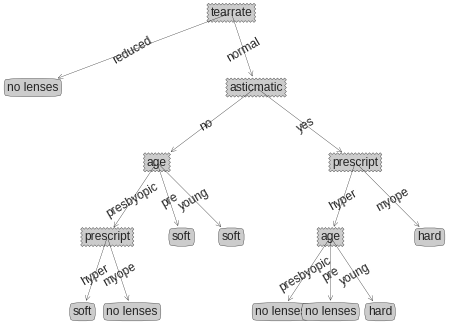

In [0]:
treePlotter.createPlot(lensesTree)

[Machine Learning with Python: Decision Trees in Python](https://www.python-course.eu/Decision_Trees.php)

In [0]:
import pandas as pd
data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])
features = data[["toothed","hair","breathes","legs"]]
target = data["species"]
data

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


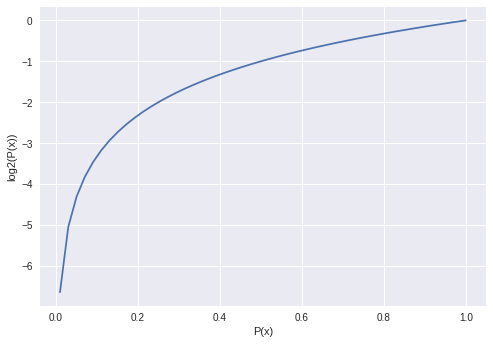

In [0]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.linspace(0.01,1),np.log2(np.linspace(0.01,1)))
ax.set_xlabel("P(x)")
ax.set_ylabel("log2(P(x))")
plt.show()

## Classification Decision trees from scratch with Python

In [0]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data

--2019-04-04 08:31:06--  http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4126 (4.0K) [text/plain]
Saving to: ‘zoo.data’

zoo.data            100%[===================>]   4.03K  --.-KB/s    in 0s      

2019-04-04 08:31:07 (322 MB/s) - ‘zoo.data’ saved [4126/4126]



In [0]:
"""
Make the imports of python packages needed
"""

import pandas as pd
import numpy as np
from pprint import pprint

In [0]:
#Import the dataset and define the feature as well as the target datasets / columns#
dataset = pd.read_csv('zoo.data',
                      names=['animal_name','hair','feathers','eggs','milk',
                             'airbone','aquatic','predator','toothed','backbone',
                             'breathes','venomous','fins','legs','tail','domestic','catsize','class',])#Import all columns omitting the fist which consists the names of the animals
#We drop the animal names since this is not a good feature to split the data on
dataset=dataset.drop('animal_name',axis=1)

In [0]:
def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [0]:
def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [0]:
def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    """
    ID3 Algorithm: This function takes five paramters:
    1. data = the data for which the ID3 algorithm should be run --> In the first run this equals the total dataset
 
    2. originaldata = This is the original dataset needed to calculate the mode target feature value of the original dataset
    in the case the dataset delivered by the first parameter is empty
    3. features = the feature space of the dataset . This is needed for the recursive call since during the tree growing process
    we have to remove features from our dataset --> Splitting at each node
    4. target_attribute_name = the name of the target attribute
    5. parent_node_class = This is the value or class of the mode target feature value of the parent node for a specific node. This is 
    also needed for the recursive call since if the splitting leads to a situation that there are no more features left in the feature
    space, we want to return the mode target feature value of the direct parent node.
    """   
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    #If the feature space is empty, return the mode target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the ID3 algorithm and hence
    #the mode target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        #Select the feature which best splits the dataset
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        tree = {best_feature:{}}
        
        
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the ID3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return(tree) 

In [0]:
def predict(query,tree,default = 1):
    """
    Prediction of a new/unseen query instance. This takes two parameters:
    1. The query instance as a dictionary of the shape {"feature_name":feature_value,...}
    2. The tree 
    We do this also in a recursive manner. That is, we wander down the tree and check if we have reached a leaf or if we are still in a sub tree. 
    Since this is a important step to understand, the single steps are extensively commented below.
    1.Check for every feature in the query instance if this feature is existing in the tree.keys() for the first call, 
    tree.keys() only contains the value for the root node 
    --> if this value is not existing, we can not make a prediction and have to 
    return the default value which is the majority value of the target feature
    2. First of all we have to take care of a important fact: Since we train our model with a database A and then show our model
    a unseen query it may happen that the feature values of these query are not existing in our tree model because non of the
    training instances has had such a value for this specific feature. 
    For instance imagine the situation where your model has only seen animals with one to four
    legs - The "legs" node in your model will only have four outgoing branches (from one to four). If you now show your model
    a new instance (animal) which has for the legs feature the vale 5, you have to tell your model what to do in such a 
    situation because otherwise there is no classification possible because in the classification step you try to 
    run down the outgoing branch with the value 5 but there is no such a branch. Hence: Error and no Classification!
    We can address this issue with a classification value of for instance (999) which tells us that there is no classification
    possible or we assign the most frequent target feature value of our dataset used to train the model. Or, in for instance 
    medical application we can return the most worse case - just to make sure... 
    We can also return the most frequent value of the direct parent node. To make a long story short, we have to tell the model 
    what to do in this situation.
    In our example, since we are dealing with animal species where a false classification is not that critical, we will assign
    the value 1 which is the value for the mammal species (for convenience).
    3. Address the key in the tree which fits the value for key --> Note that key == the features in the query. 
    Because we want the tree to predict the value which is hidden under the key value (imagine you have a drawn tree model on 
    the table in front of you and you have a query instance for which you want to predict the target feature 
    - What are you doing? - Correct:
    You start at the root node and wander down the tree comparing your query to the node values. Hence you want to have the
    value which is hidden under the current node. If this is a leaf, perfect, otherwise you wander the tree deeper until you
    get to a leaf node. 
    Though, you want to have this "something" [either leaf or sub_tree] which is hidden under the current node
    and hence we must address the node in the tree which == the key value from our query instance. 
    This is done with tree[keys]. Next you want to run down the branch of this node which is equal to the value given "behind"
    the key value of your query instance e.g. if you find "legs" == to tree.keys() that is, for the first run == the root node.
    You want to run deeper and therefore you have to address the branch at your node whose value is == to the value behind key.
    This is done with query[key] e.g. query[key] == query['legs'] == 0 --> Therewith we run down the branch of the node with the
    value 0. Summarized, in this step we want to address the node which is hidden behind a specific branch of the root node (in the first run)
    this is done with: result = [key][query[key]]
    4. As said in the 2. step, we run down the tree along nodes and branches until we get to a leaf node.
    That is, if result = tree[key][query[key]] returns another tree object (we have represented this by a dict object --> 
    that is if result is a dict object) we know that we have not arrived at a root node and have to run deeper the tree. 
    Okay... Look at your drawn tree in front of you... what are you doing?...well, you run down the next branch... 
    exactly as we have done it above with the slight difference that we already have passed a node and therewith 
    have to run only a fraction of the tree --> You clever guy! That "fraction of the tree" is exactly what we have stored
    under 'result'.
    So we simply call our predict method using the same query instance (we do not have to drop any features from the query
    instance since for instance the feature for the root node will not be available in any of the deeper sub_trees and hence 
    we will simply not find that feature) as well as the "reduced / sub_tree" stored in result.
    SUMMARIZED: If we have a query instance consisting of values for features, we take this features and check if the 
    name of the root node is equal to one of the query features.
    If this is true, we run down the root node outgoing branch whose value equals the value of query feature == the root node.
    If we find at the end of this branch a leaf node (not a dict object) we return this value (this is our prediction).
    If we instead find another node (== sub_tree == dict objct) we search in our query for the feature which equals the value 
    of that node. Next we look up the value of our query feature and run down the branch whose value is equal to the 
    query[key] == query feature value. And as you can see this is exactly the recursion we talked about
    with the important fact that for each node we run down the tree, we check only the nodes and branches which are 
    below this node and do not run the whole tree beginning at the root node 
    --> This is why we re-call the classification function with 'result'
    """
    
    
    #1.
    for key in list(query.keys()):
        if key in list(tree.keys()):
            #2.
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            #3.
            result = tree[key][query[key]]
            #4.
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

In [0]:
"""
Check the accuracy of our prediction.
The train_test_split function takes the dataset as parameter which should be divided into
a training and a testing set. The test function takes two parameters, which are the testing data as well as the tree model.
"""
###########################################################################################################
###########################################################################################################
def train_test_split(dataset):
    training_data = dataset.iloc[:80].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[80:].reset_index(drop=True)
    return training_data,testing_data
training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 
def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    #Calculate the prediction accuracy
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["class"])/len(data))*100,'%')

In [0]:
"""
Train the tree, Print the tree and predict the accuracy
"""
tree = ID3(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'legs': {0: {'fins': {0.0: {'toothed': {0.0: 7.0, 1.0: 3.0}},
                       1.0: {'eggs': {0.0: 1.0, 1.0: 4.0}}}},
          2: {'hair': {0.0: 2.0, 1.0: 1.0}},
          4: {'hair': {0.0: {'toothed': {0.0: 7.0, 1.0: 5.0}}, 1.0: 1.0}},
          6: {'aquatic': {0.0: 6.0, 1.0: 7.0}},
          8: 7.0}}
The prediction accuracy is:  85.71428571428571 %


## Using sklearn

In [0]:
"""
Import the DecisionTreeClassifier model.
"""
#Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
###########################################################################################################
##########################################################################################################
"""
Import the Zoo Dataset
"""
#Import the dataset 
dataset = pd.read_csv('zoo.data',
                      names=['animal_name','hair','feathers','eggs','milk',
                             'airbone','aquatic','predator','toothed','backbone',
                             'breathes','venomous','fins','legs','tail','domestic','catsize','class',])
#We drop the animal names since this is not a good feature to split the data on
dataset=dataset.drop('animal_name',axis=1)
###########################################################################################################
##########################################################################################################
"""
Split the data into a training and a testing set
"""
train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]
###########################################################################################################
##########################################################################################################
"""
Train the model
"""
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)
###########################################################################################################
##########################################################################################################
"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(test_features)
###########################################################################################################
##########################################################################################################
"""
Check the accuracy
"""
print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")

The prediction accuracy is:  80.95238095238095 %
